In [132]:
import sys
assert sys.version_info >=(3, 5)
from tensorflow import keras

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
# 가로 * 세로 = row * clomun

# Each number size = 8 by 8

digits = load_digits()

x_data = digits.data
y_data = digits.target

# Split train and test data by 7:3
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

# Set class names
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]


In [133]:
# Print Sample images from 1st to 10th
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)
def save_fig(fig_id, tight_layout = True, fig_extension = "png", resolution = 300) :
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장 : ", fig_id)
    if tight_layout :
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)


그림 저장 :  digits_plot


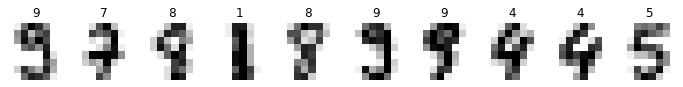

In [134]:
# Should resize x_train's shape to get result we want
n_rows = 1
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows) :
    for col in range(n_cols) :
        idx = n_cols * row + col
        plt.subplot(n_rows,n_cols, idx + 1)
        plt.imshow(x_train[idx].reshape(8, 8), cmap = "binary", interpolation = "nearest")
        plt.axis("off")
        plt.title(class_names[y_train[idx]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
save_fig("digits_plot", tight_layout = False)
plt.show()

In [135]:
# Set model and add layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [8, 8]))
# relu : usually used in Hidden layers 
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
# softmax : usually used in Output layer
model.add(keras.layers.Dense(10, activation = "softmax"))

# Show current layer status
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               19500     
_________________________________________________________________
dense_58 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                1010      
Total params: 50,610
Trainable params: 50,610
Non-trainable params: 0
_________________________________________________________________


In [136]:
# Compile model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [137]:
# 
import time
tb_hist = keras.callbacks.TensorBoard(log_dir = './graph', histogram_freq = 0, write_graph = True, write_images = True)
start = time.time()
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), callbacks = [tb_hist])
print("time : ", time.time()-start) 

Epoch 1/30
40/40 [==============================] - 1s 8ms/step - loss: 1.5439 - accuracy: 0.6786 - val_loss: 0.4574 - val_accuracy: 0.8852
Epoch 2/30
40/40 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.9228 - val_loss: 0.3084 - val_accuracy: 0.9148
Epoch 3/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1842 - accuracy: 0.9531 - val_loss: 0.2843 - val_accuracy: 0.9130
Epoch 4/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9634 - val_loss: 0.1767 - val_accuracy: 0.9556
Epoch 5/30
40/40 [==============================] - 0s 3ms/step - loss: 0.1059 - accuracy: 0.9737 - val_loss: 0.1799 - val_accuracy: 0.9481
Epoch 6/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0857 - accuracy: 0.9841 - val_loss: 0.1645 - val_accuracy: 0.9537
Epoch 7/30
40/40 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9905 - val_loss: 0.2409 - val_accuracy: 0.9074
Epoch 8/30
40/40 [==